In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from collections import defaultdict
import seaborn as sns
from matplotlib.ticker import FuncFormatter

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multitest import multipletests

from scipy.stats import shapiro, levene, rankdata, linregress, kruskal

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

import helper

/gpfs1/home/c/p/cpetak/CA_GRN2/helper.py:165: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  next_step = windows.dot(grn)
/gpfs1/home/c/p/cpetak/CA_GRN2/helper.py:186: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'C', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  next_step = gene_vals.dot(internal_grn)


In [2]:
root1="~/CA_GRN_results/non_detailed_save/extra_inputs/"
root2="~/CA_GRN_results/non_detailed_save/"
root3="~/CA_GRN_results/detailed_save/"
season_len = 300
seed_intss = [[69904,149796],[4147842,1238860],[1677032,1410667],[2607162,1754028],[286634,159689],[2961036,153075],[3430997,2634107]]
metric = "maxfits"
num_reps = 15

maxxs = []
maxys = []
rules = [22, 126, 154, 18, 122, 70,54,94,30,50,62,110,90,150,102]

for idx, seed_ints in enumerate(seed_intss):
    for rule in rules:
        if idx == 0:
            root=root3
        elif idx == 1:
            root=root2
        else:
            root=root1
        vari_maxs, env1_maxs, env2_maxs=helper.get_fits([rule,rule], seed_ints, metric, root, season_len, num_reps, id_start = 0)
        vari_maxs=[v[:9600] for v in vari_maxs]
        env1_maxs=[v[:9600] for v in env1_maxs]
        env2_maxs=[v[:9600] for v in env2_maxs]
        
        d,c,ps,lists = helper.scatter_value(vari_maxs, env1_maxs, env2_maxs, season_len=300)
        
        maxxs.append(d[0])
        maxys.append(d[1])

In [6]:
print(maxys[:15])

[-0.00720094649143832, -0.008174637860203005, -0.022848330602733613, 0.013015457849643086, -0.06102947563834127, -0.005306464337946903, 0.08152268596762813, -0.027037971490074475, -0.0016690028230015308, -0.001235639733614291, 0.046506426564111636, -0.0015349670195471399, -0.004574131473320531, -0.0038457864212471105, 0.045161091155387245]


In [7]:
metric = "avefits"

avexs = []
aveys = []

for idx, seed_ints in enumerate(seed_intss):
    for rule in rules:
        if idx == 0:
            root=root3
        elif idx == 1:
            root=root2
        else:
            root=root1
        vari_maxs, env1_maxs, env2_maxs=helper.get_fits([rule,rule], seed_ints, metric, root, season_len, num_reps, id_start = 0)
        vari_maxs=[v[:9600] for v in vari_maxs]
        env1_maxs=[v[:9600] for v in env1_maxs]
        env2_maxs=[v[:9600] for v in env2_maxs]
        
        d,c,ps,lists = helper.scatter_value(vari_maxs, env1_maxs, env2_maxs, season_len=300)

        avexs.append(d[0])
        aveys.append(d[1])

In [8]:
print(aveys[:15])

[0.01531421501016672, 0.009983608673139965, 0.03700336393491588, 0.010342495751489489, -0.0025151493934424396, 0.021868881527882356, 0.08231568287595659, 0.002744272245494672, 0.029847586108568747, -0.044707407056641446, 0.10554288669812228, 0.048051081847839794, 0.030562542254217284, 0.01794278094918844, 0.09708437199593367]


/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as

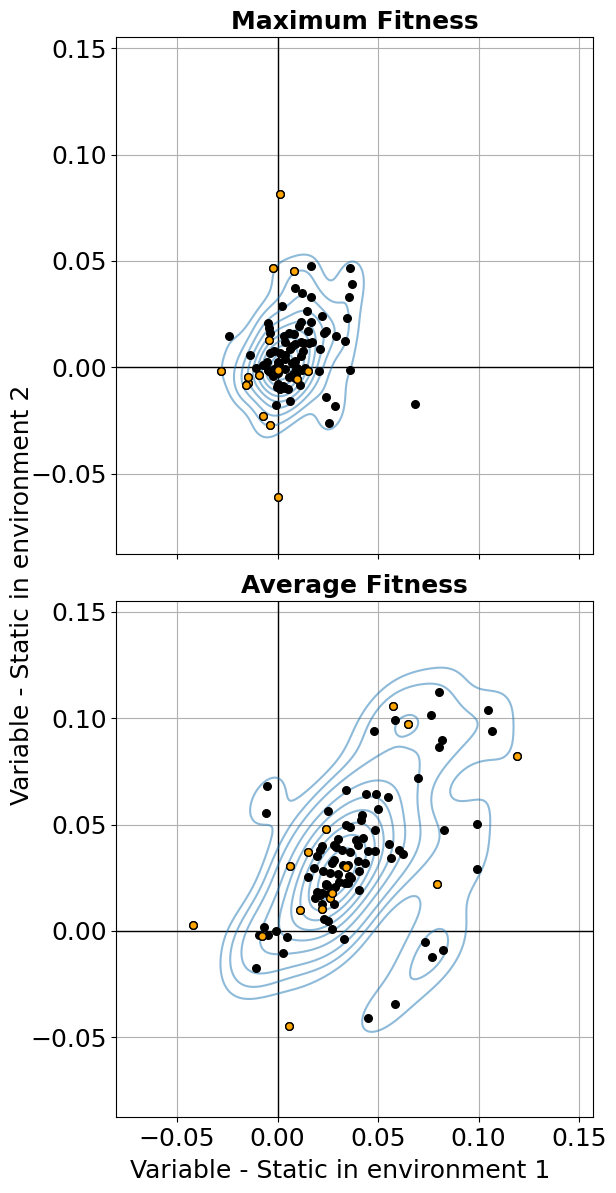

In [23]:
# Main figure and subplots
fig, [ax0, ax1] = plt.subplots(figsize=(6, 12), ncols=1, nrows = 2, sharex=True, sharey=True)

# Add lines to subplots
for ax in [ax0, ax1]:
    ax.axvline(0, lw=1, color="black", zorder=1, alpha=1)
    ax.axhline(0, lw=1, color="black", zorder=1, alpha=1)

sns.kdeplot(x = maxxs, y = maxys, ax=ax0,fill=False,thresh=0.1,zorder=1,alpha=0.5)
ax0.scatter(maxxs,maxys,marker="o", color="black", s=30)
ax0.scatter(maxxs[:num_reps],maxys[:num_reps],marker="o", color="orange",edgecolors='black', s=30)

sns.kdeplot(x = avexs, y = aveys, ax=ax1,fill=False,thresh=0.1,zorder=1,alpha=0.5)
ax1.scatter(avexs,aveys,marker="o", color="black", s=30)
ax1.scatter(avexs[:num_reps],aveys[:num_reps],marker="o", color="orange",edgecolors='black', s=30)

# Axis labels and titles
fig.supxlabel('Variable - Static in environment 1', fontsize = 18, x=0.55)
fig.supylabel('Variable - Static in environment 2', fontsize = 18, x=0)


ax0.set_title("Maximum Fitness", weight="bold", fontsize=18)
ax1.set_title("Average Fitness", weight="bold", fontsize=18)

# Set axis properties
for ax in [ax0, ax1]:
    ax.grid()
    ax.set_axisbelow(True)

plt.tight_layout()
ax0.tick_params(axis='both', which='major', labelsize=18)
ax1.tick_params(axis='both', which='major', labelsize=18)
#plt.show()
#plt.savefig('main_scatters.svg', format='svg')
plt.style.use('default')

/tmp/ipykernel_97014/4100553193.py:58: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle, color in zip(legend.legendHandles, custom_colors):


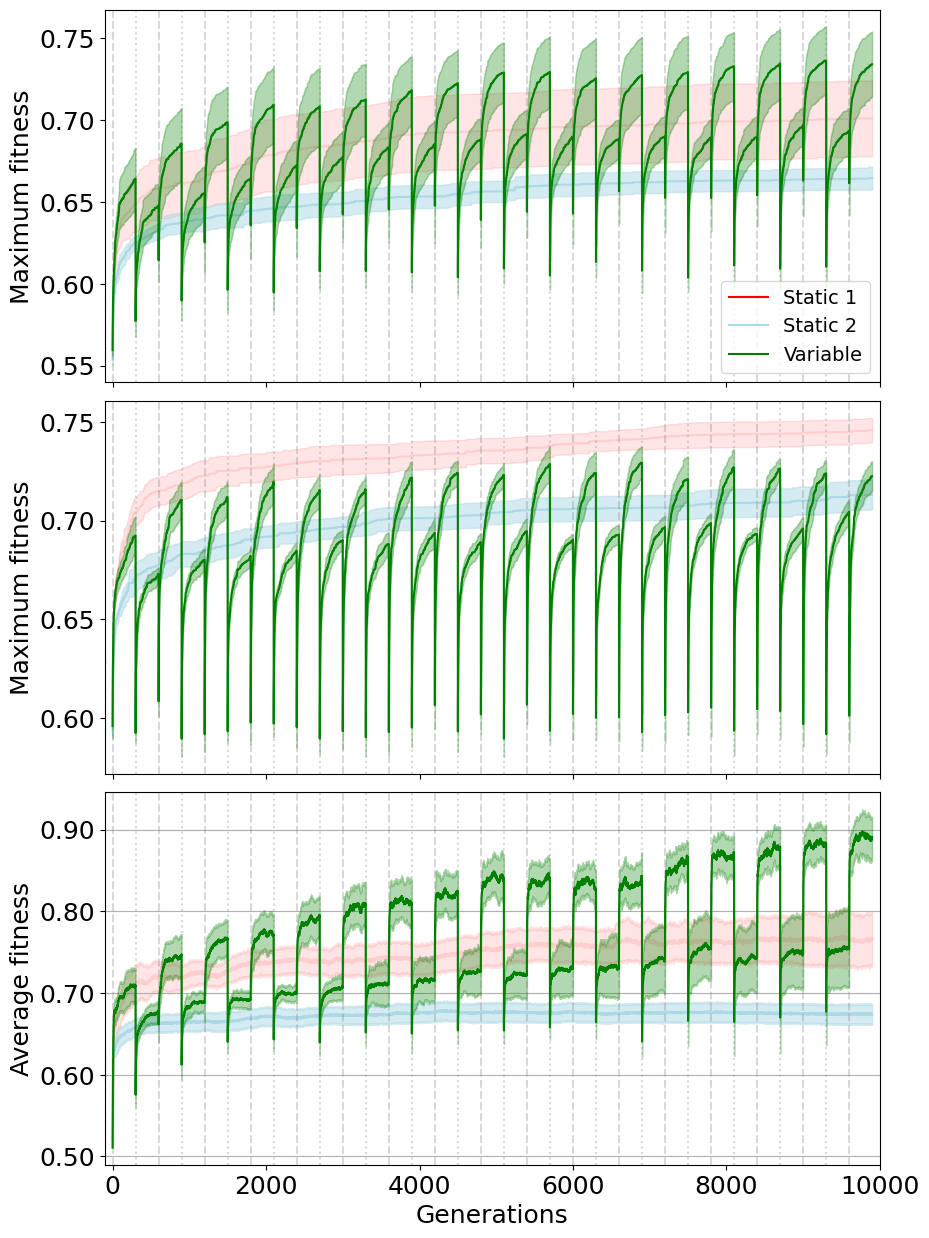

In [64]:
#4/30, 0/126, 0/54
seed_intss = [[286634,159689],[69904,149796],[69904,149796]]
rules = [30, 126, 54]
metrics=["maxfits", "maxfits", "avefits"]
roots = ["~/CA_GRN_results/non_detailed_save/extra_inputs/", "~/CA_GRN_results/detailed_save/", "~/CA_GRN_results/detailed_save/"]
ylabs = ["Maximum fitness","Maximum fitness","Average fitness"]

season_len = 300
num_reps=15
id_start=0
def format_yticks(tick, _):
        return f"{tick:.2f}"

labels=["Variable","Static 1","Static 2"]
colors = ["green", "red", "lightblue"]
z_value = 1.96  # For a 95% confidence interval

fig, axs=plt.subplots(nrows=3,ncols=1, figsize=(10, 15),sharex=True, gridspec_kw={'hspace': 0.05}) #sharey=True)

for idx, rule in enumerate(rules):
    
    all_maxs=helper.get_fits([rule,rule], seed_intss[idx], metrics[idx], roots[idx], season_len, num_reps, id_start, extrapolate=True)
    all_maxs=np.array(all_maxs)
    
    for i,m in enumerate(all_maxs[1:]):
        mean1 = np.mean(m, axis=0)
        stderr1 = np.std(m, axis=0) / np.sqrt(num_reps)
        ci_upper = mean1 + z_value * stderr1
        ci_lower = mean1 - z_value * stderr1
        if i == 1: #season 2
             malpha = 1 #line
             fmalpha = 0.5 #error bar
        else:
             malpha = 0.1
             fmalpha = 0.1
        axs[idx].fill_between(range(len(mean1)), ci_lower, ci_upper, alpha=fmalpha, color = colors[1:][i], zorder = i)
        axs[idx].plot(mean1, "-", label=labels[1:][i], color = colors[1:][i], alpha=malpha, zorder = i)

    m=all_maxs[0]
    mean1 = np.mean(m, axis=0)
    stderr1 = np.std(m, axis=0) / np.sqrt(num_reps)
    ci_upper = mean1 + z_value * stderr1
    ci_lower = mean1 - z_value * stderr1
    axs[idx].fill_between(range(len(mean1)), ci_lower, ci_upper, alpha=0.3,color=colors[0], zorder = i+1)
    axs[idx].plot(mean1, "-", label= labels[0], color=colors[0], zorder = i+2)
    axs[idx].set_xlim(-100,10_000)
    axs[idx].set_ylabel(ylabs[idx], fontsize=18)
    axs[idx].tick_params(axis='both', which='major', labelsize=18)

    if idx == 0:
        legend = axs[idx].legend(
        fontsize=14,
        loc='lower right'  # bottom right corner
        )

        # Set legend line alpha and colors
        custom_colors = ['red', 'lightblue', 'green']  # Customize as needed
        for handle, color in zip(legend.legendHandles, custom_colors):
            handle.set_alpha(1)
            handle.set_color(color)

    #ax.set_ylim(0,0.7)
    #ax.legend(prop={'size': 18})
    for j in range(0, len(mean1), season_len):
        if j % (season_len * 2) == 0:
            axs[idx].axvline(j, linestyle="--", color="gray", alpha=0.3)
        else:
            axs[idx].axvline(j, linestyle=":", color="gray", alpha=0.3)
        

    # plt.ylabel("Maximum Fitness", fontsize="18")
    # 
    # ax.tick_params(axis='both', which='major', labelsize=18)

    
plt.xlabel("Generations", fontsize="18")

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_yticks))
plt.grid(axis='y')

plt.show()


    

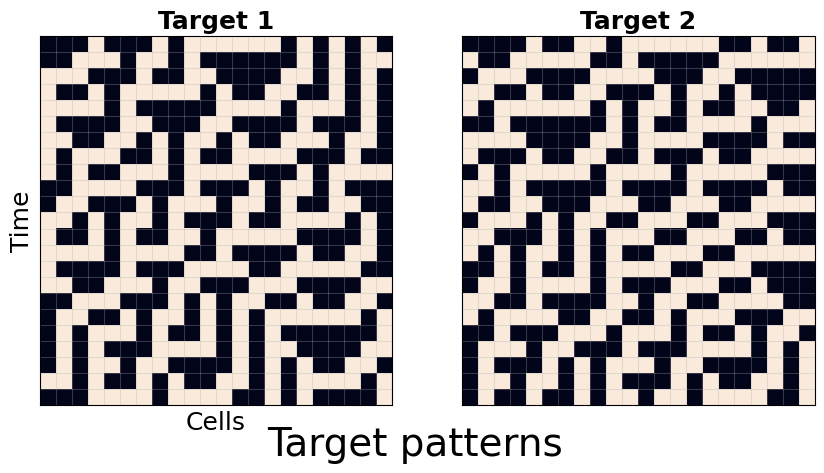

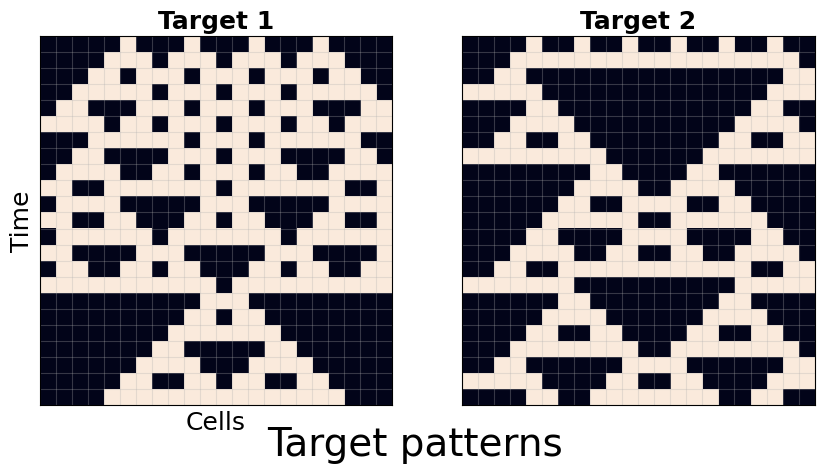

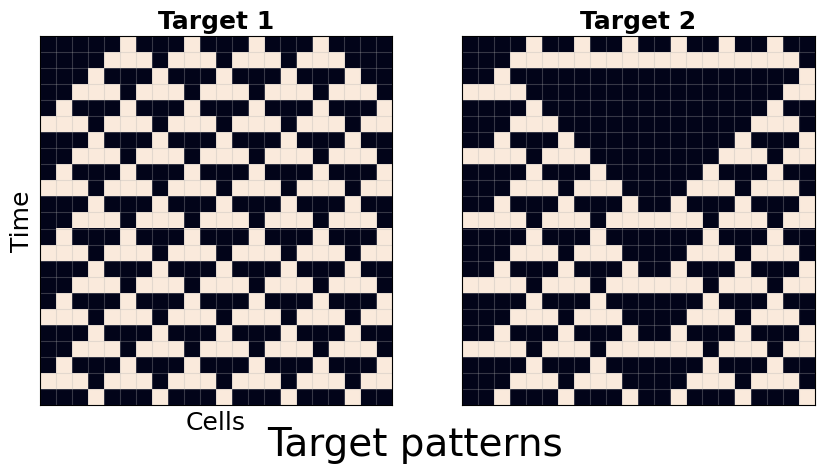

In [69]:
seed_intss = [[286634,159689],[69904,149796],[69904,149796]]
rules = [30, 126, 54]

ncols=2
nrows=1
scale=5
pop_size = 10
grn_size = 22
num_cells = 22
dev_steps = 22
geneid=1
pop = np.random.randn(pop_size, grn_size+2, grn_size).astype(np.float64)

for idx, rule in enumerate(rules):
    
    targets1, phenos, fitnesses1 = helper.get_pop_TPF(pop, pop_size, num_cells, grn_size, dev_steps, geneid, rule, seed_intss[idx][0],seed_intss[idx][0])
    targets2, phenos, fitnesses2 = helper.get_pop_TPF(pop, pop_size, num_cells, grn_size, dev_steps, geneid, rule, seed_intss[idx][1],seed_intss[idx][1])

    fig, axs = plt.subplots(figsize=(ncols * scale, nrows * scale), ncols=ncols, nrows=nrows)


    im = helper.imshow_ca(targets1, ax=axs[0])
    im = helper.imshow_ca(targets2, ax=axs[1])

    axs[0].set_title("Target 1", weight="bold", fontsize=18)
    axs[1].set_title("Target 2", weight="bold", fontsize=18)

    axs[0].set_xlabel("Cells", fontsize=18)
    #ax.xaxis.set_label_position("top")
    axs[0].set_ylabel("Time", fontsize=18)
    #ax.set_title("Local")

    #plt.xlabel("Target patterns")
    fig.supxlabel("Target patterns", fontsize=28)
    plt.show()